<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Article about Mobile Client + Python Server](https://heartbeat.comet.ml/uploading-images-from-android-to-a-python-based-flask-server-691e4092a95e)

[Article about Mobile Client + Python Server #2](https://medium.com/analytics-vidhya/how-to-make-client-android-application-with-flask-for-server-side-8b1d5c55446e)

[Данные про датасеты](https://towardsdatascience.com/public-datasets-for-machine-learning-in-geoscience-cf880862300a)

#02. PyTorch Neural Network Classification



##0. Architecture of a classification neural network

##1. Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X": X[:, 1],
                        "label" : y
                        })
circles.head(10)

,X1,X,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [3]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

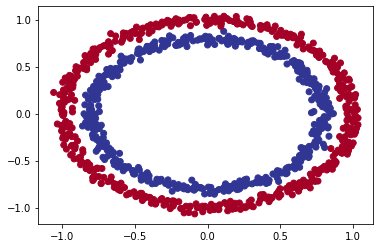

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [7]:
X.shape, y.shape, type(X)

((1000, 2), (1000,), numpy.ndarray)

In [8]:
print(f"Значения для одной записи X: {X[0]} и те же для y: {y[0]}")
print(f"Форма для X: {X[0].shape} и те же для y: {y[0].shape}")

Значения для одной записи X: [0.75424625 0.23148074] и те же для y: 1
Форма для X: (2,) и те же для y: ()


In [9]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

##2. Building a model

In [12]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [13]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

This is known as having 5 hidden units or neurons.

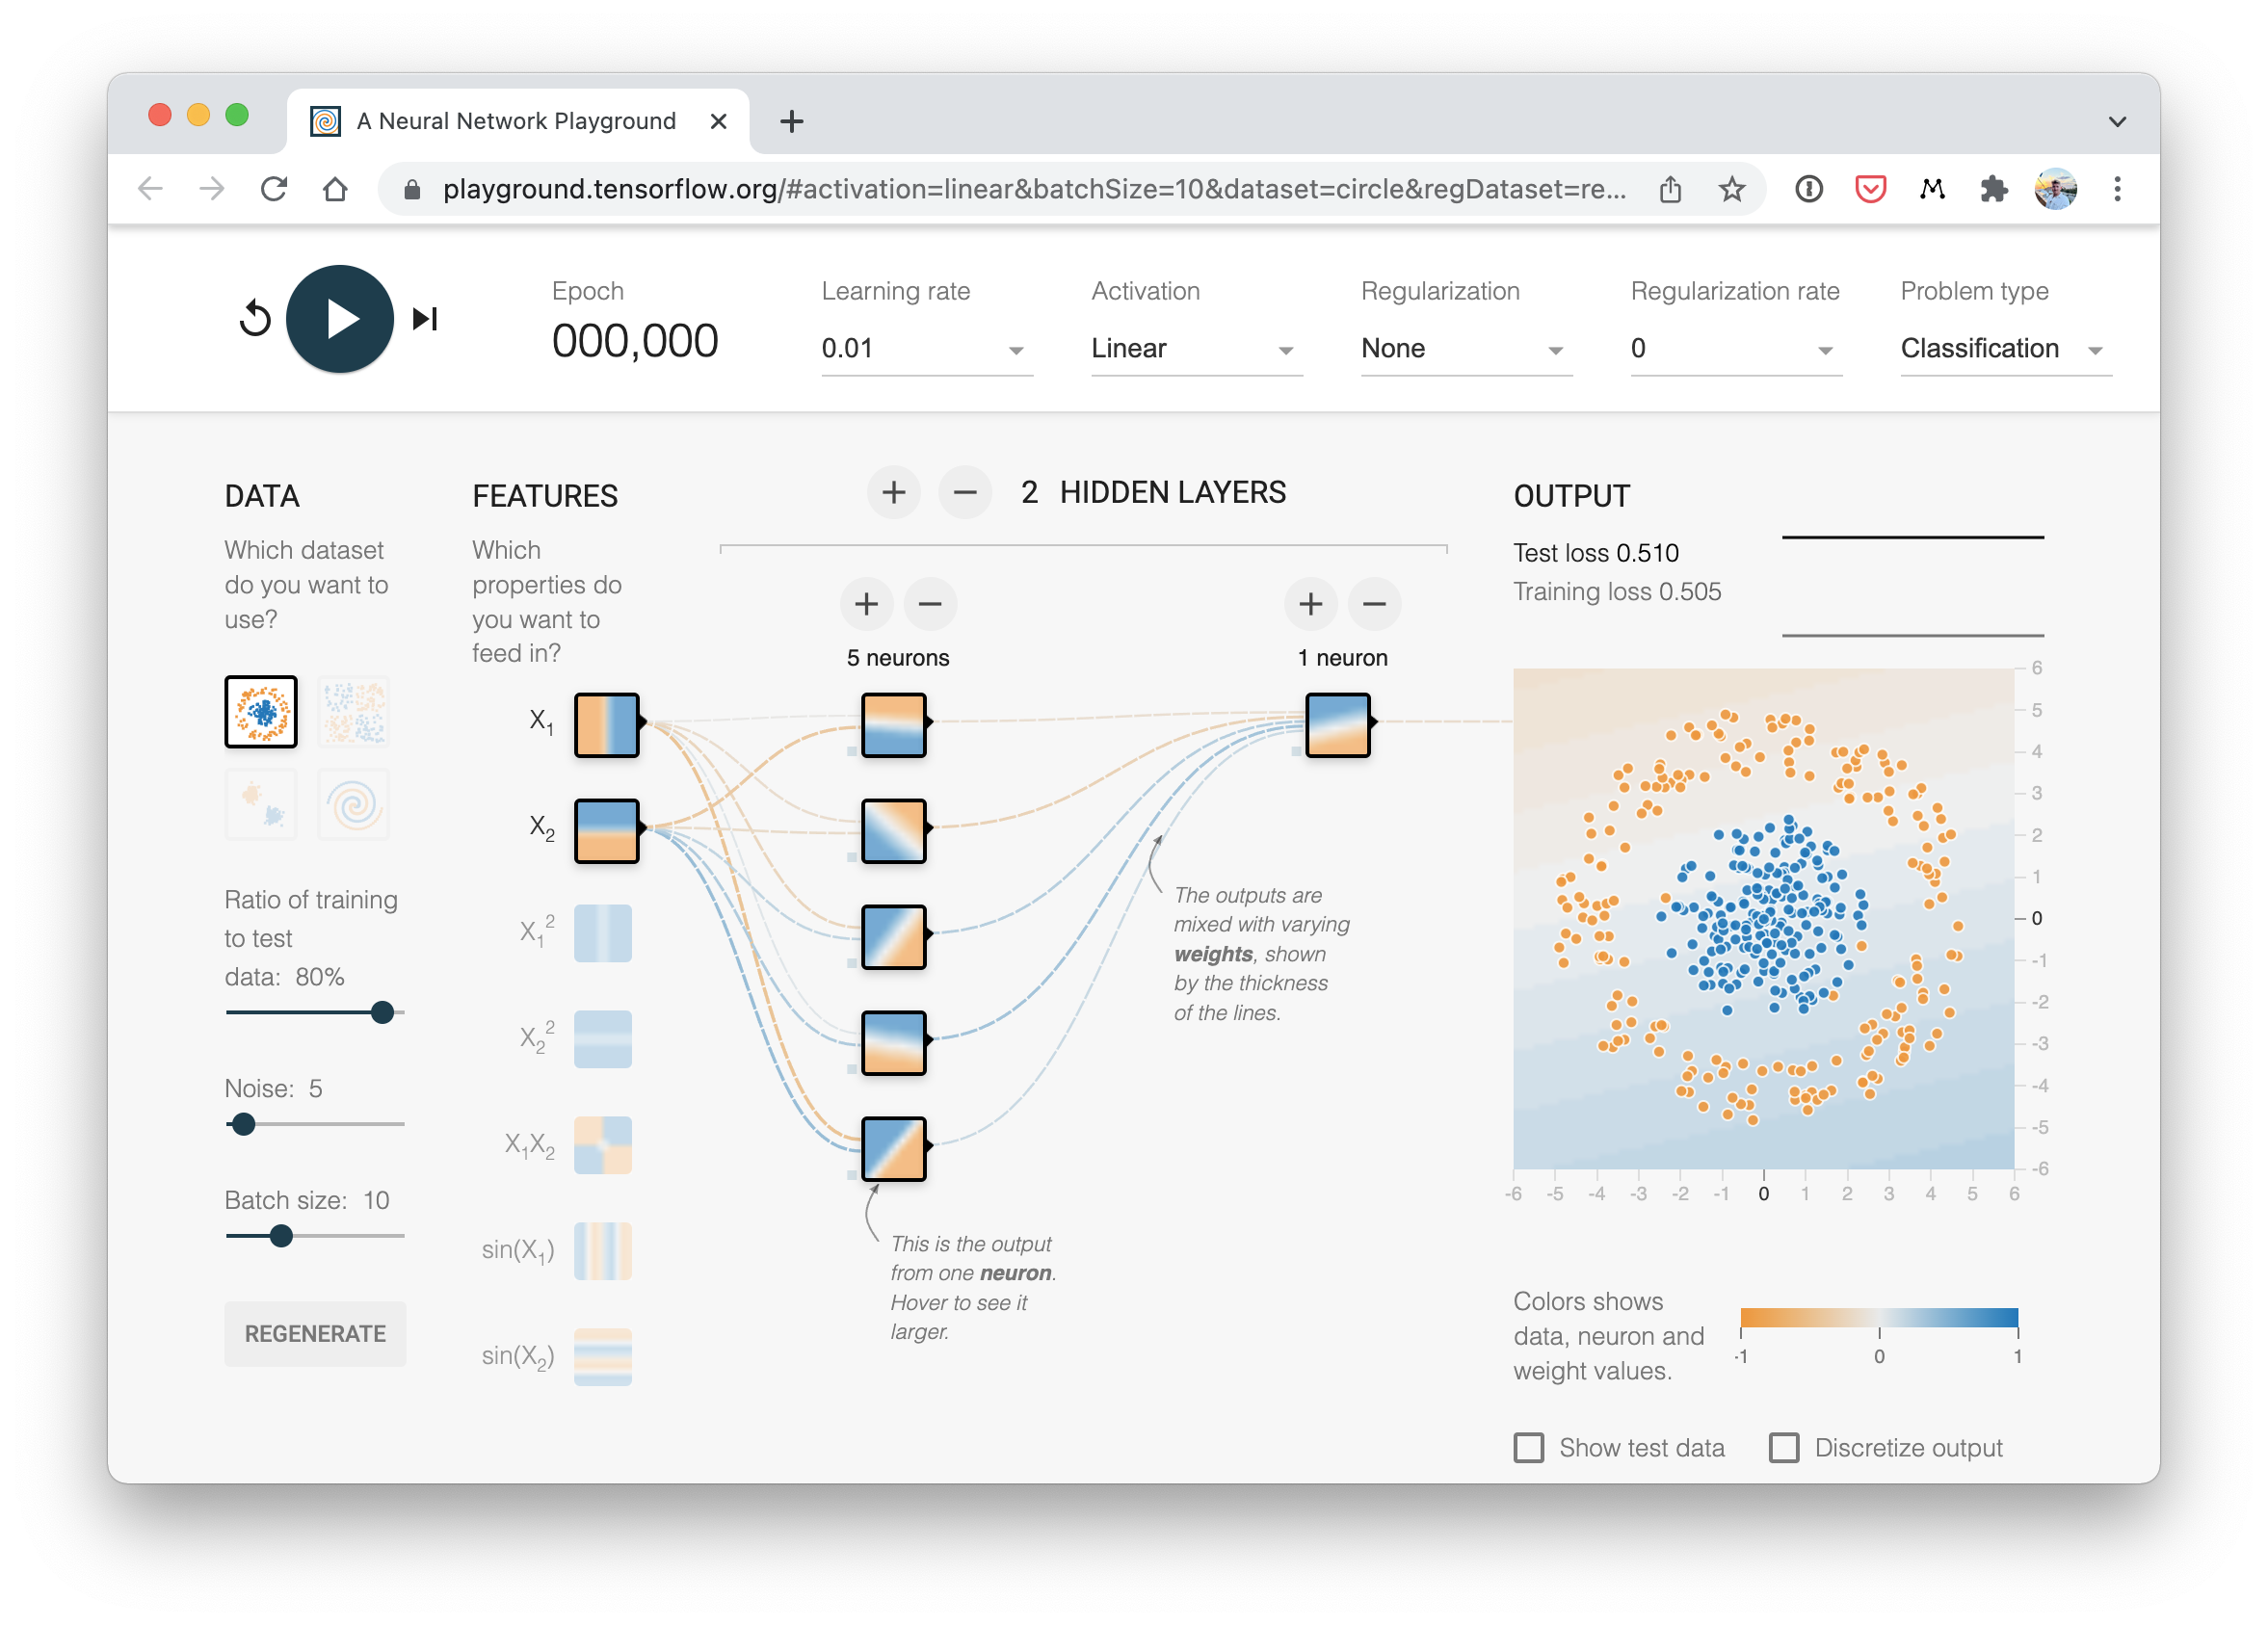

[См выше](https://playground.tensorflow.org/#activation=relu&regularization=L1&batchSize=6&dataset=spiral&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=30&networkShape=8,7,6,5,2&seed=0.70147&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

In [14]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

###2.1 Setup loss function and optimize

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [16]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

**Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).


**Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).


**Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).


**Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).


**Step the optimizer (gradient descent)** - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

[Had stopped here](https://www.learnpytorch.io/02_pytorch_classification/)